# Introduction

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.
The correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.


Dataset: UCI Machine Learning Repository for breast cancer dataset
Link: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

Download Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



#Objective
This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input.

In [ ]:
#Download Dataset from my Github Repository
!wget https://github.com/BhatnagarKshitij/Breast-Cancer-AI-ML/raw/main/data.csv

--2022-12-07 12:56:51--  https://github.com/BhatnagarKshitij/Breast-Cancer-AI-ML/raw/main/data.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BhatnagarKshitij/Breast-Cancer-AI-ML/main/data.csv [following]
--2022-12-07 12:56:51--  https://raw.githubusercontent.com/BhatnagarKshitij/Breast-Cancer-AI-ML/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 122.27K  --.-KB/s    in 0.002s  

2022-12-07 12:56:51 (52.1 MB/s) - ‘data.csv’ saved [125204/125204]



In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing Breast Cancer Dataset
dataset=pd.read_csv("/content/data.csv")
#Deleting Unnamed Column (Additional column automatically added)
if dataset.shape[1]==33:
    print("Deleting Additional Row")
    dataset.drop(dataset.columns[[32]],axis=1,inplace=True)
dataset.head()

Deleting Additional Row


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 ‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign.

In [ ]:
#Count Total numbers of Malignant and Benign
dataset["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

#Visualizing Data

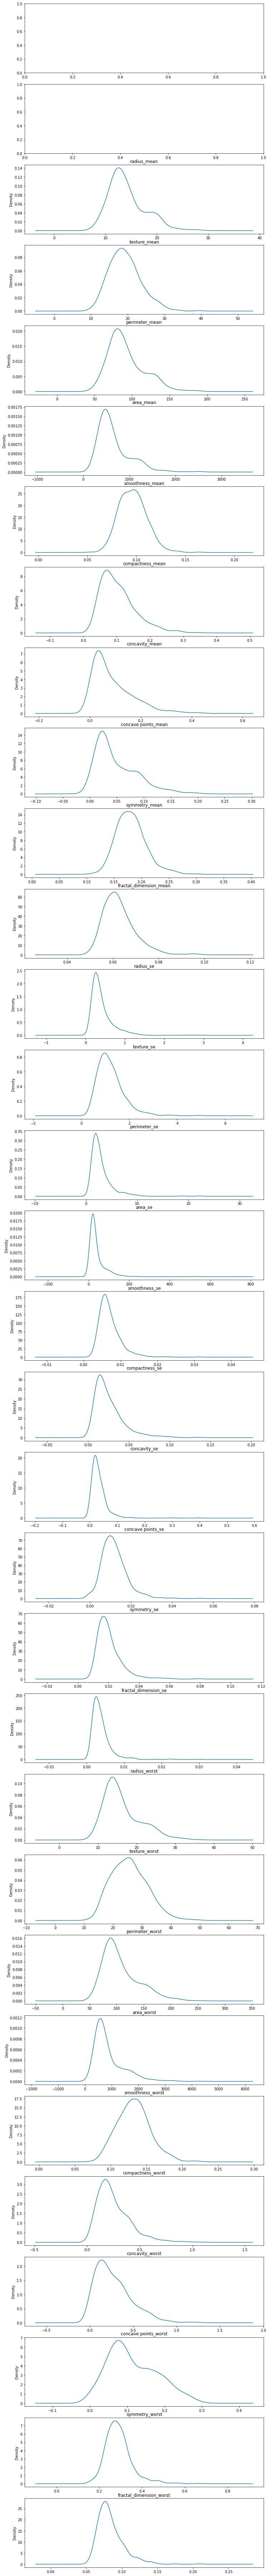

In [ ]:
fig,axis=plt.subplots(32,1,figsize=(10,100))
fig.tight_layout()
for index,colName in enumerate(dataset.columns):
    if colName in ["diagnosis","id"]:
        continue
    dataset[colName].plot(ax=axis[index],kind="density",title=colName)

#Data Cleaning

In [ ]:
#Check for Null or NA values
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Convert "diagnosis" to 1 or 0

#Method 1:
#Crawl each values in the column, and add them in list
def methodOne(value):
    diaOne=list()
    for data in value["diagnosis"]:
        diaOne.append(1) if data=="M" else diaOne.append(0)
    return diaOne
#Method 1:
#Crawl each values in the column, and add them in list
def methodOneSeries(value):
    diaOne=list()
    for data in value:
        diaOne.append(1) if data=="M" else diaOne.append(0)
    return diaOne

#Method2:
#Use sykit Learn Library module named LabelEncoder
def methodTwo(value):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_Y = LabelEncoder()
    dia = labelencoder_Y.fit_transform(value["diagnosis"].values)
    return dia


#Training Data
Our training data should not have id and diagnosis column as they are not the valid arguments for detecting Breast cancer.

In [ ]:
X=dataset.iloc[:,2:].values
Y=dataset.iloc[:,1]
Y=methodOneSeries(Y)

#Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#Scaling
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

We will use StandardScaler method from SciKit-Learn library.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

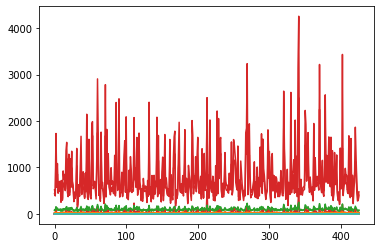

In [ ]:
plt.plot(X_train)

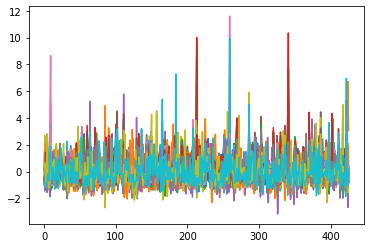

In [ ]:
plt.plot(X_train_scaled)

In [ ]:
maxXX=float("-inf")
minXX=float("inf")
maxX=float("-inf")
minX=float("inf")

for col in X_train:
    maxXX=max(maxXX,max(col))
    minXX=min(minXX,min(col))


for col in X_train_scaled:
    maxX=max(maxX,max(col))
    minX=min(minX,min(col))
print("Maximum Value Before: ",str(maxXX))
print("Minimum Value Before:", str(minXX))
print("Maximum Value After: ",str(maxX))
print("Minimum Value After:", str(minX))

Maximum Value Before:  4254.0
Minimum Value Before: 0.0
Maximum Value After:  11.597615106097704
Minimum Value After: -3.1604315949062243


#Model Selection
We have different types of classification algorithms in Machine Learning :-

1. Logistic Regression

2. Nearest Neighbor

3. Support Vector Machines

4. Kernel SVM

5. Naïve Bayes

6. Decision Tree Algorithm

7. Random Forest Classification

Lets start applying the algorithms

In [ ]:
def LogisticRegression(X_train,Y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def nearestNeighbour(X_train,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    return classifier
def SVM(X_train,Y_train):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def kernelSVM(X_train,Y_train):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def naiveBayes(X_train,Y_train):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)
    return classifier
def decisionTree(X_train,Y_train):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier
def randomForest(X_train,Y_train):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, Y_train)
    return classifier

In [ ]:
classifications=[LogisticRegression,nearestNeighbour,SVM,kernelSVM,naiveBayes,decisionTree,randomForest]

In [ ]:
#To find model accuracy
from sklearn.metrics import confusion_matrix

In [ ]:
preds=list()
cms=list()
for classification in classifications:
    classifier=classification(X_train_scaled,Y_train)
    Y_pred=classifier.predict(X_test_scaled)
    preds.append(Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    cms.append(cm)

   

In [ ]:
def calculateAccuracyFromCM(matrix):
    return ((matrix[0][0]+matrix[1][1])/(sum(matrix[0])+sum(matrix[1])))*100


def calculatePrecisionFromCM(matrix):
    return (matrix[0][0]/(matrix[0][0]+matrix[1][0]))*100


def calculateRecallFromCM(matrix):
    return (matrix[0][0]/(matrix[0][0]+matrix[1][1]))*100

In [ ]:
for index,classification in enumerate(classifications):
    print(classification.__name__+":")
    print("\t"+ "Accuracy: "+str(calculateAccuracyFromCM(cms[index])))
    print("\t"+ "Precision: "+str(calculatePrecisionFromCM(cms[index])))
    print("\t"+ "Recall: "+str(calculateRecallFromCM(cms[index])))

    print("-"*50)

LogisticRegression:
	Accuracy: 95.8041958041958
	Precision: 96.66666666666667
	Recall: 63.503649635036496
--------------------------------------------------
nearestNeighbour:
	Accuracy: 95.1048951048951
	Precision: 93.6842105263158
	Recall: 65.44117647058823
--------------------------------------------------
SVM:
	Accuracy: 97.2027972027972
	Precision: 97.77777777777777
	Recall: 63.30935251798561
--------------------------------------------------
kernelSVM:
	Accuracy: 96.5034965034965
	Precision: 96.7032967032967
	Recall: 63.76811594202898
--------------------------------------------------
naiveBayes:
	Accuracy: 91.6083916083916
	Precision: 93.33333333333333
	Recall: 64.12213740458014
--------------------------------------------------
decisionTree:
	Accuracy: 95.8041958041958
	Precision: 97.72727272727273
	Recall: 62.77372262773723
--------------------------------------------------
randomForest:
	Accuracy: 98.6013986013986
	Precision: 98.88888888888889
	Recall: 63.12056737588653
------